## 
- In ARIMA (AutoRegressive Integrated Moving Average) models, exogenous variables, often denoted as Xt, are external factors or predictors that are not part of the time series being analyzed but may influence it. These variables are used to enhance the forecasting performance of the model by incorporating additional information that can help explain the variability in the dependent variable.

- In a basic ARIMA model, only the past values of the time series itself are used to make forecasts. However, in the presence of exogenous variables, the ARIMA model becomes an ARIMAX (AutoRegressive Integrated Moving Average with eXogenous variables) model.
Forecasting equation incorporates both the autoregressive (AR) terms and the moving average (MA) terms, as well as any exogenous variables if present.

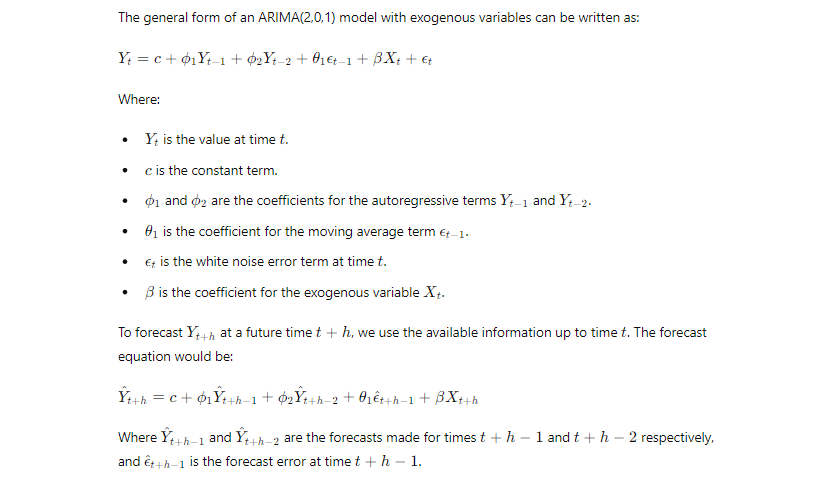

## Example Forecasting Equation for ARIMA(2,0,1) with Exogenous Variable
### Given the parameters of the model:



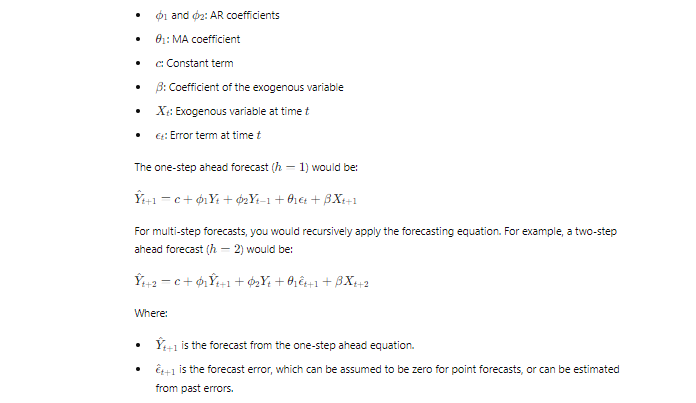

## Extracting the Forecast Equation
- To ensure the forecast equation matches the model's output exactly, you can extract the parameters from the fitted model and manually compute the forecast

Solving ARIMA Mathematically 
- example where we have monthly sales data for a product over the past few years and we want to forecast future sales using ARIMA(2,0,1) with an exogenous variable, which in this case could be advertising expenditure on the product.

### Suppose we have the following data:

- Month: January, February, March, ..., December
- Sales (Y): 100, 120, 110, ..., 150
- Advertising Expenditure (X): 5000, 5500, 6000, ..., 7000
#### We will first fit the ARIMA(2,0,1) model with the exogenous variable using the provided data. Then, we will use the fitted model to forecast sales for the next few months.

- Step 1: Fit ARIMA(2,0,1) with Exogenous Variable Model
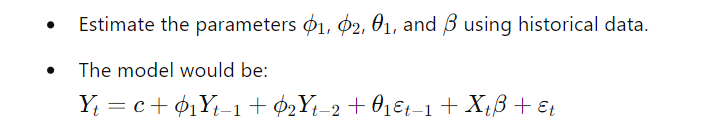

- Step 2: Forecast Future Sales

Once the model is fitted, we can use it to forecast sales for the next few months by providing future values of the exogenous variable

## Calculations
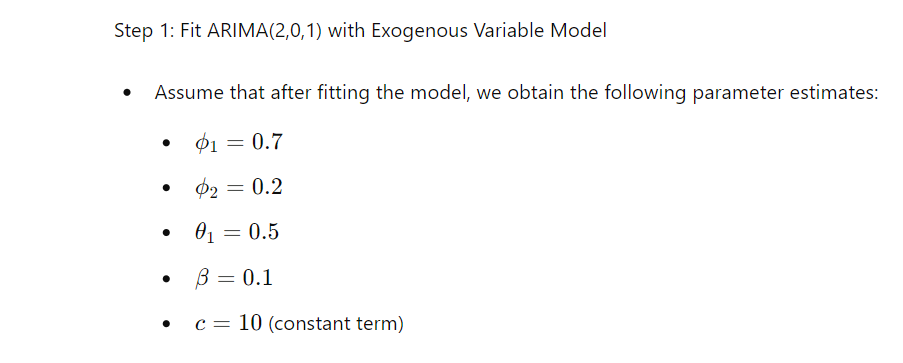

## Step 2: Forecast Future Sales

- Suppose we want to forecast sales for the next 3 months and we have the following advertising expenditures for those months:
- Advertising Expenditure for Month 1 (Next month): 7500
- Advertising Expenditure for Month 1 (Next month): 8000
- Advertising Expenditure for Month 3 (Three months ahead):8500
**We will use the fitted model to forecast sales for these months**

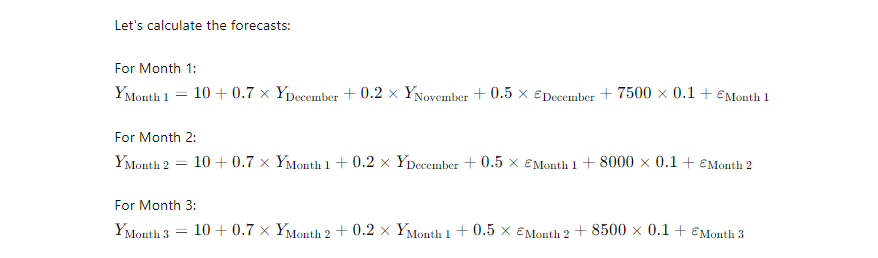

These equations give us forecasts for the sales in the next 3 months, considering the influence of the exogenous variable (advertising expenditure). We can solve these equations iteratively to obtain numerical forecasts.

!pip install wordcloud --trusted-host pypi.org --trusted-host files.pythonhosted.org --upgrade statsmodels
## ARIMA(2,1,1) with exogenous variables

In [3]:
# Install or update required libraries
#!pip install --upgrade statsmodels

import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Example data
np.random.seed(0)
Y = np.random.randn(100)  # Your time series data
exog = np.random.randn(100)  # Your exogenous variable

# Fit the ARIMA(2,1,1) model
model = ARIMA(Y, order=(2,1,1), exog=exog)
model_fit = model.fit()

In [4]:
# Forecast for the next time point
exog_forecast = np.array([1.0])  # Replace with your future exogenous value
forecast = model_fit.get_forecast(steps=1, exog=exog_forecast.reshape(1, -1))
predicted_mean = forecast.predicted_mean

print(f"Forecasted value: {predicted_mean}")

Forecasted value: [0.45392518]


a=[0,1,2,3]

In [5]:
# Extract fitted model parameters
params = model_fit.params
c = params[0]  # Extracting the constant term directly
phi1 = params[1]
phi2 = params[2]
theta1 = params[3]
beta = params[4]

# Get the last observed values
Y_t = Y[-1]
Y_t_minus_1 = Y[-2]
Y_t_minus_2 = Y[-3]
epsilon_t = model_fit.resid[-1]

# Manual forecast calculation
diff_Y_t = Y_t - Y_t_minus_1
diff_Y_t_minus_1 = Y_t_minus_1 - Y_t_minus_2

manual_forecast = Y_t + c + phi1 * diff_Y_t + phi2 * diff_Y_t_minus_1 + theta1 * epsilon_t + beta * exog_forecast[0]

print(f"Manual forecasted value: {manual_forecast}")


Manual forecasted value: 1.5533403948815536


## Quick Practice: code for fitting an ARIMA(2,0,1) model with exogenous variables:

In [ ]:
# Install or update required libraries
##!pip install --upgrade statsmodels

import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Example data
np.random.seed(0)
Y = np.random.randn(100)  # Your time series data
exog = np.random.randn(100)  # Your exogenous variable

# Fit the ARIMA(2,0,1) model
model = ARIMA(Y, order=(2,0,1), exog=exog)
model_fit = model.fit()

# Forecast for the next time point
exog_forecast = np.array([1.0])  # Replace with your future exogenous value
forecast = model_fit.get_forecast(steps=1, exog=exog_forecast.reshape(1, -1))
predicted_mean = forecast.predicted_mean

print(f"Forecasted value: {predicted_mean}")

# Extract fitted model parameters
params = model_fit.params
c = params[0]  # Extracting the constant term directly
phi1 = params[1]
phi2 = params[2]
theta1 = params[3]
beta = params[4]

# Get the last observed values
Y_t = Y[-1]
Y_t_minus_1 = Y[-2]
epsilon_t = model_fit.resid[-1]

# Manual forecast calculation
manual_forecast = c + phi1 * Y_t + phi2 * Y_t_minus_1 + theta1 * epsilon_t + beta * exog_forecast[0]

print(f"Manual forecasted value: {manual_forecast}")
